In [1]:
# En caso de ejecutar en Google Colab, clonar el repositorio:
#!git clone https://github.com/fco-parga/mna_proyecto_integrador_eq09.git

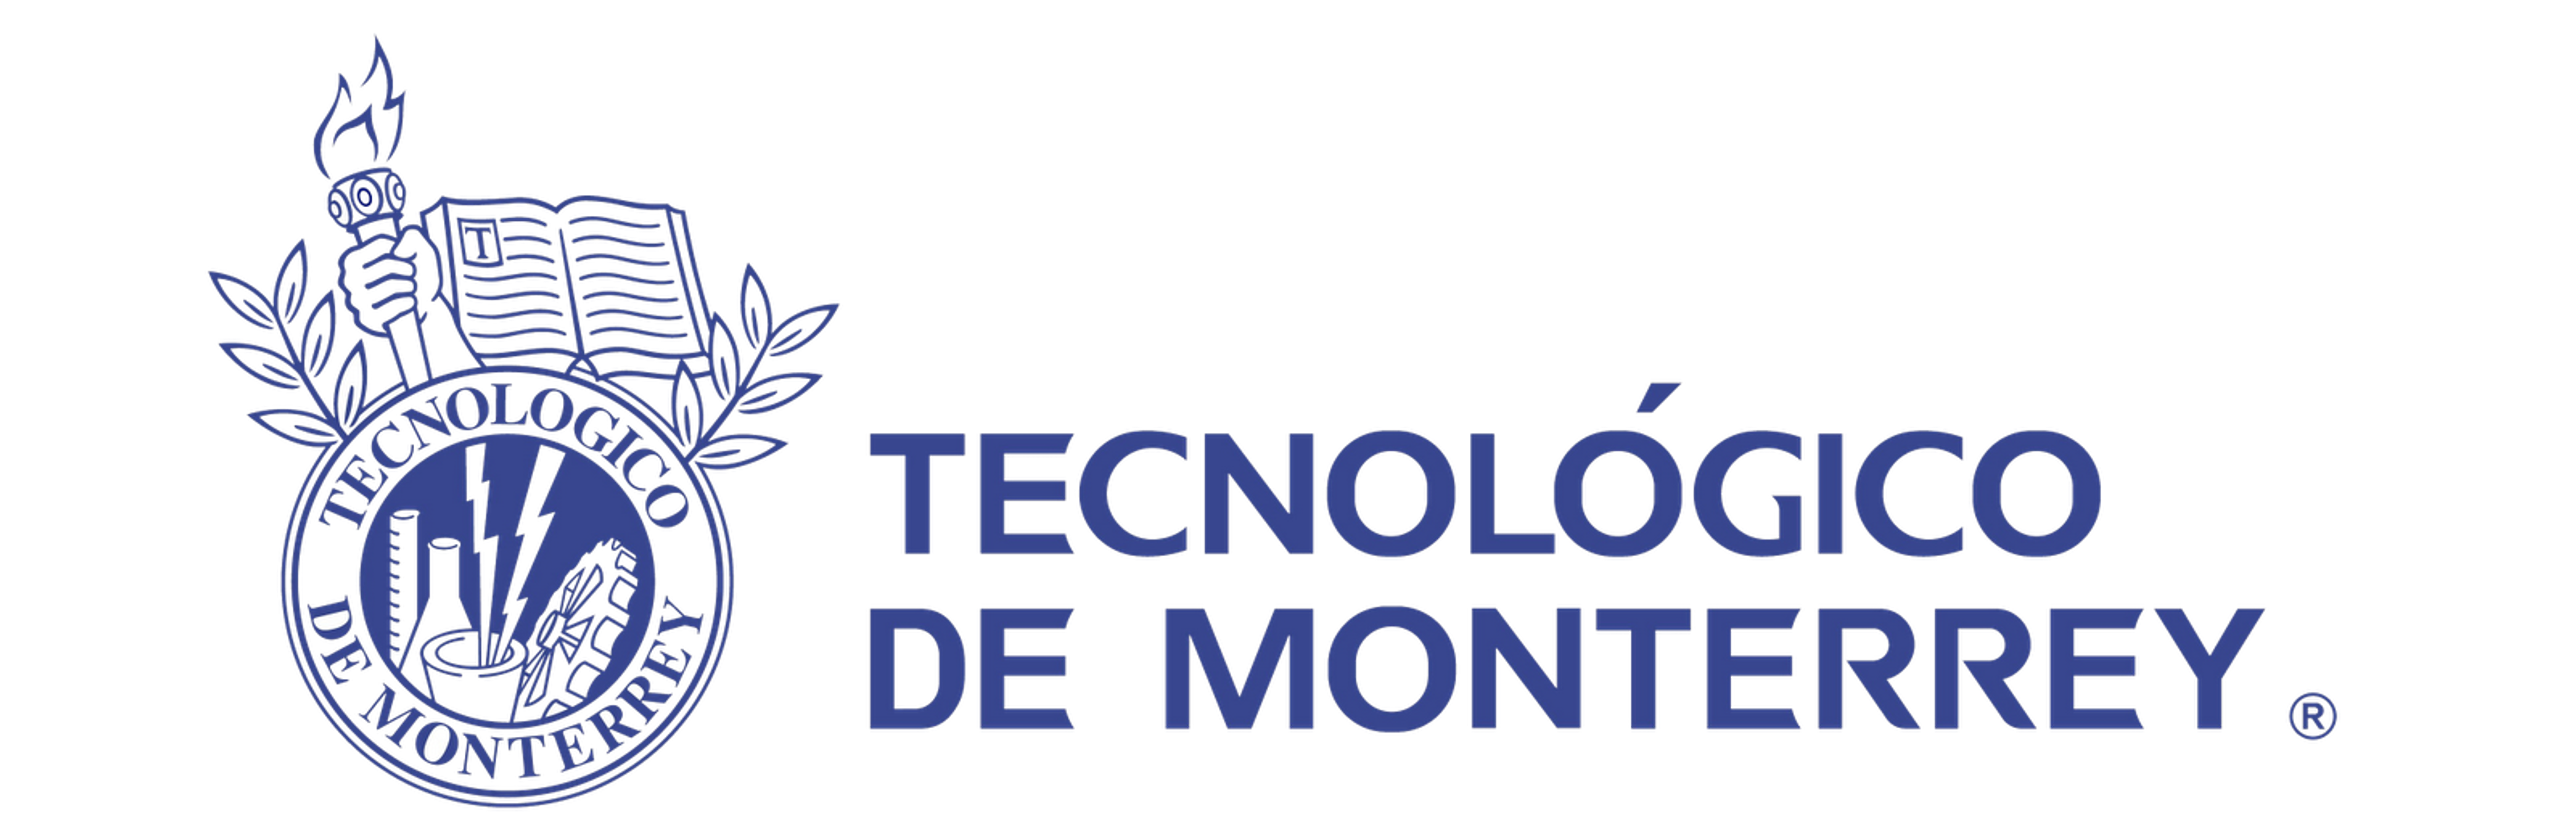

## TC5035 Proyecto integrador
### Tecnológico de Monterrey
#### Dra. Grettel Barceló Alonso
#### Dr. Luis Eduardo Falcón Morales

___


## Equipo 09

### Segmentación de audiencias y detección de respuesta emocional para anuncios digitales exteriores

Integrantes

> - Enrique Hernández García A01793727
> - Alejandro Tomás Mackey A01164338
> - Francisco Javier Parga García A01794380

# Avance 3
## Baseline

- Objetivos

    3.1 Establecer las medidas de calidad del modelo de aprendizaje automático.
    
    3.2 Proporcionar un marco de referencia para evaluar y mejorar modelos más avanzados.


# Reposiotorio
https://github.com/fco-parga/mna_proyecto_integrador_eq09/

>- EDA: https://github.com/fco-parga/mna_proyecto_integrador_eq09/blob/main/code/notebooks/EDA/Avance1.09.pdf
>- 

# Folder de librerias

In [2]:
import os
import sys
import time
from pathlib import Path

def add_to_sys_path(project_folder):
    # Get the current working directory
    current_working_dir = os.getcwd()
    
    # Construct the path to the project directory
    project_path = os.path.join(current_working_dir.split(project_folder)[0], project_folder)
    
    # Add the project path to sys.path if it's not already there
    if project_path not in sys.path:
        sys.path.append(project_path)
        print(f"Added {project_path} to sys.path")
    else:
        print(f"{project_path} is already in sys.path")

    os.chdir(project_path)

In [3]:
project_folder_name = "mna_proyecto_integrador_eq09"
add_to_sys_path(project_folder_name)

Added C:\Users\fcopa\OneDrive\Python\mna\mna_proyecto_integrador_eq09 to sys.path


In [4]:
from librerias_integrador.utils import verificar_ambiente

In [5]:
envsys = verificar_ambiente()

Estás trabajando en un sistema Windows.


# Carga de datos

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 50)

In [7]:
data_path = 'data/'

In [8]:
# Archivo con conteos iniciales
raw_csv = 'raw/hitorical_30min.csv'

raw_data_file = os.path.join(data_path, raw_csv)

raw_df = pd.read_csv(raw_data_file, index_col=0, low_memory=False)

# Convertir a datetime 
raw_df['event_timestamp'] = pd.to_datetime(raw_df['event_timestamp'])

#Convertir de UTC a -6 hrs
raw_df['event_timestamp'] = raw_df['event_timestamp'].dt.tz_convert('America/Mexico_City')

# Asignar como índice
raw_df.set_index('event_timestamp', inplace=True)

raw_df.head(5)

,country_code,country_name,city_code,city_name,zip_code,lat,lon,cam_id,cam_name,cam_additional_location_description,add_id,add_name,add_type,people,views,females,males,mode_age,median_age,negative_emotion,positive_emotion,average_emotion_score,cars,weather,sport_event,social_event,extraordinary_event,storage_blob
event_timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-04-25 19:24:21.511896-06:00,MX,Mexico,MX-CMX,Mexico City,9460.0,19.36487,-99.13421,1.0,cafe calaverita,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MX/cafe calaverita/2023-04-25 19:24:21.100613-...
2023-04-25 19:54:59.165048-06:00,MX,Mexico,MX-CMX,Mexico City,9460.0,19.36487,-99.13421,1.0,cafe calaverita,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MX/cafe calaverita/2023-04-25 19:54:58.584229-...
2023-04-25 20:25:05.386453-06:00,MX,Mexico,MX-CMX,Mexico City,9460.0,19.36487,-99.13421,1.0,cafe calaverita,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MX/cafe calaverita/2023-04-25 20:25:05.010663-...
2023-04-25 20:56:02.770007-06:00,MX,Mexico,MX-CMX,Mexico City,9460.0,19.36487,-99.13421,1.0,cafe calaverita,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MX/cafe calaverita/2023-04-25 20:56:02.447836-...
2023-04-25 21:26:39.954640-06:00,MX,Mexico,MX-CMX,Mexico City,9460.0,19.36487,-99.13421,1.0,cafe calaverita,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MX/cafe calaverita/2023-04-25 21:26:39.538730-...


## Distribución de conteo

In [9]:
from librerias_integrador.ploteo import plot_df_counts_histogram, plot_df_counts_timeseries

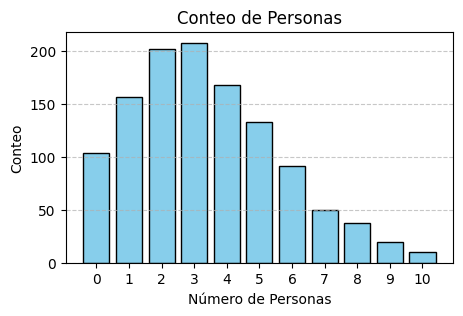

In [10]:
plot_df_counts_histogram(raw_df)

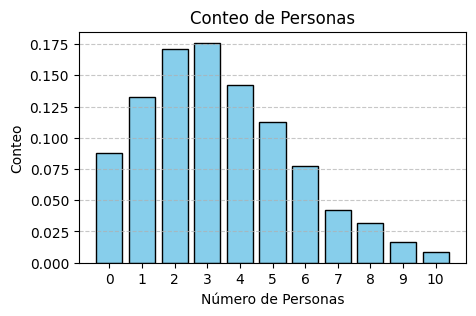

In [11]:
plot_df_counts_histogram(raw_df, normalize=True)

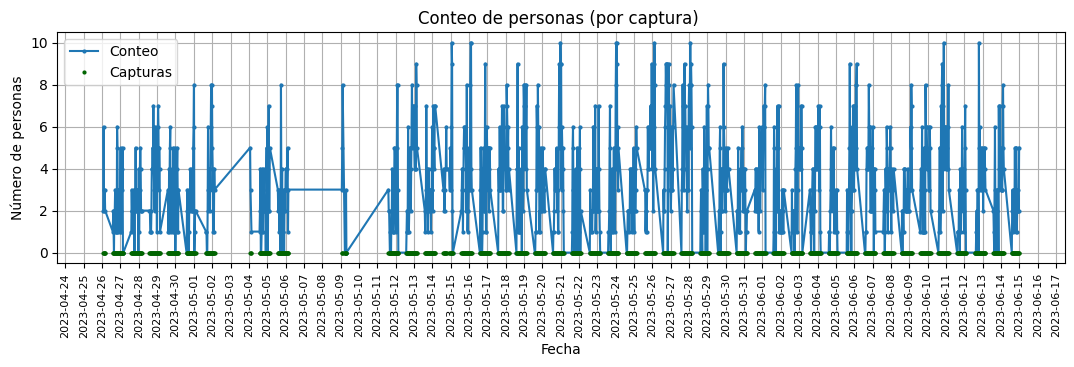

In [12]:
plot_df_counts_timeseries(raw_df, angle=90)

# Agragaciones temporales

In [13]:
grupos_dic = {}
agrupaciones = ['D']

for intervalo in agrupaciones:

    grupos_dic[intervalo] = raw_df.resample(intervalo).agg(
        mean=('people', 'mean'),
        sum=('people', 'sum')
    )

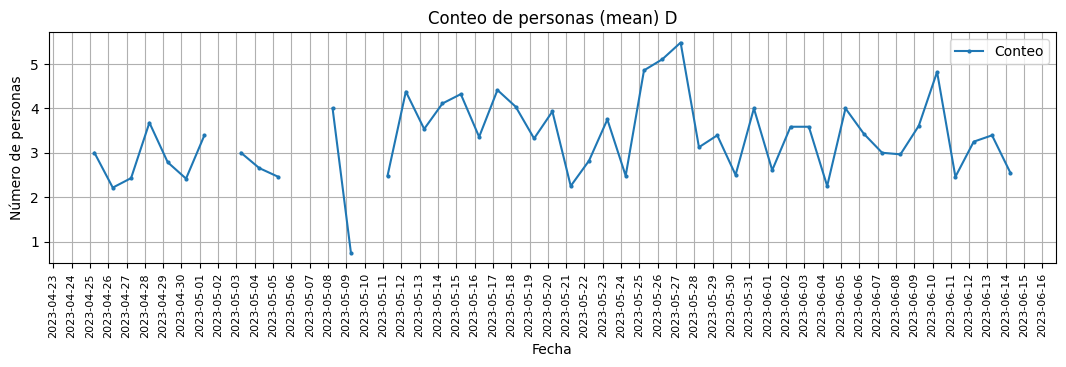

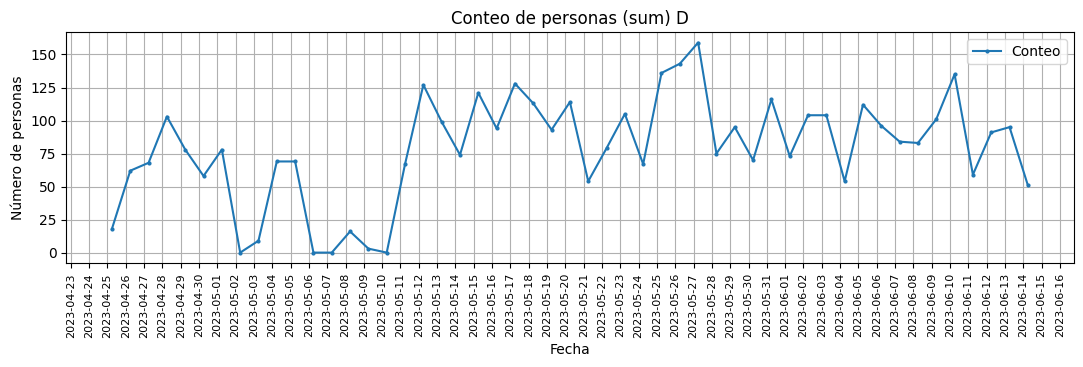

In [14]:
for intervalo in agrupaciones:
    for agg in ['mean','sum']:
        plot_df_counts_timeseries(grupos_dic[intervalo], grouped=True, agg2plot=agg, intervalo=intervalo,angle=90)

In [15]:
conteo_por_dia = pd.DataFrame(grupos_dic['D']['sum'].value_counts()).reset_index()

# Definimos los rangos
bins = [0, 50, 100, 150, 200, 250, float('inf')]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', 'Mayor a 250']

# Creamos una nueva columna 'range' que indica el rango al que pertenece cada 'sum'
conteo_por_dia['range'] = pd.cut(conteo_por_dia['sum'], bins=bins, labels=labels, right=False)

# Agrupamos por la nueva columna 'range' y sumamos los 'count'
conteo_diario_por_rango = conteo_por_dia.groupby('range', observed=False)['count'].sum().reset_index()

conteo_diario_por_rango

,range,count
0,0-50,8
1,51-100,27
2,101-150,15
3,151-200,1
4,201-250,0
5,Mayor a 250,0


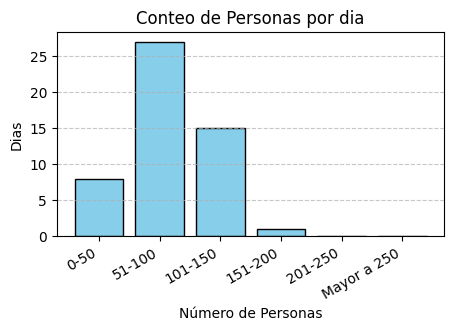

In [16]:
# Crear un gráfico de barras
plt.figure(figsize=(5, 3))
plt.bar(conteo_diario_por_rango['range'], conteo_diario_por_rango['count'], color='skyblue', edgecolor='black', align='center')

# Añadir títulos y etiquetas
plt.title('Conteo de Personas por dia')
plt.xlabel('Número de Personas')
plt.ylabel('Dias')
plt.xticks(range(len(conteo_diario_por_rango)))  # Asegura que el eje x tenga marcas de 0 a 10
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gcf().autofmt_xdate()

# Mostrar el gráfico
plt.show()

# Ingenieria de caracteristicas

La ingeniería de características en series de tiempo es un paso crucial en el análisis y modelado de datos temporales. Se centra en la transformación de datos crudos en formatos que revelen más información y sean más adecuados para algoritmos de aprendizaje automático. Renault et al.(2023) destacan la importancia de la ingeniería de características automática para la clasificación de series de tiempo, demostrando que los métodos basados en características pueden ser tan precisos como los algoritmos de vanguardia. Además, el uso de la Transformada Rápida de Fourier (FFT) como herramienta de ingeniería de características ha demostrado mejorar la precisión y eficiencia de los modelos de pronóstico de series de tiempo.

*Referencias*
> - Galán-Sales, F.J., Reina-Jiménez , P., Carranza-García, M., Luna-Romera, J.M. (2023). An Approach to Enhance Time Series Forecasting by Fast Fourier Transform. In: García Bringas, P., et al. 18th International Conference on Soft Computing Models in Industrial and Environmental Applications (SOCO 2023). SOCO 2023. Lecture Notes in Networks and Systems, vol 749. Springer, Cham. https://doi.org/10.1007/978-3-031-42529-5_25 

> - Renault, A., Bondu, A., Lemaire, V., & Gay, D. (2023, June). Automatic Feature Engineering for Time Series Classification: Evaluation and Discussion. In 2023 International Joint Conference on Neural Networks (IJCNN) (pp. 1-10). IEEE. https://doi.org/10.1109/IJCNN54540.2023.10191074 


In [17]:
from sklearn.linear_model import LinearRegression

from librerias_integrador.features.datetime_feat import create_date_time_features

En este conjunto de datos hemos creado una característica de tendencia utilizando un modelo de regresión lineal, lo que permite capturar la dirección y velocidad del cambio en tus datos a lo largo del tiempo. 

In [18]:
grupos_dic['D']['timestamp'] = pd.to_datetime(grupos_dic['D'].index)
grupos_dic['D']['trend'] = np.arange(len(grupos_dic['D']))

# Ajustar un modelo de regresión lineal para la tendencia
X = grupos_dic['D'][['trend']]  # Característica de tendencia
y = grupos_dic['D']['sum']  # Variable objetivo
model = LinearRegression()
model.fit(X, y)

# Crear características de tendencia
grupos_dic['D']['trend_feature'] = model.predict(X)

Además, hemos extraído características temporales como el año, mes, día y día de la semana, así como un indicador binario para los fines de semana. Estas características pueden ayudar a los modelos a identificar y aprender patrones estacionales y tendencias a lo largo del tiempo, lo que es esencial para tareas como la predicción y clasificación en series de tiempo.

In [19]:
daily_with_features = create_date_time_features(grupos_dic['D'], 'timestamp')[['sum','trend','trend_feature','year','month','day','weekday','is_weekend']]
daily_with_features.head()

,sum,trend,trend_feature,year,month,day,weekday,is_weekend
event_timestamp,,,,,,,,
2023-04-25 00:00:00-06:00,18,0,49.782805,2023,4,25,1,0
2023-04-26 00:00:00-06:00,62,1,50.930317,2023,4,26,2,0
2023-04-27 00:00:00-06:00,68,2,52.077828,2023,4,27,3,0
2023-04-28 00:00:00-06:00,103,3,53.225339,2023,4,28,4,0
2023-04-29 00:00:00-06:00,78,4,54.372851,2023,4,29,5,1


El resultado de la ingeniería de características muestra una combinación de datos numéricos y categóricos que reflejan tanto la tendencia subyacente como los patrones temporales específicos de los datos. La inclusión de estas características enriquecidas puede mejorar significativamente la capacidad de los modelos de aprendizaje automático para hacer predicciones precisas y proporcionar insights valiosos a partir de los datos de series de tiempo.

# Baseline

In [20]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, RobustScaler
from xgboost import XGBRegressor
from sklearn.base import BaseEstimator, TransformerMixin
import scipy.stats as stats

try:
    import cupy as cp
    cupy_library = True
except:
    cupy_library = False

print(f'GPU: {cupy_library}')

GPU: True


In [21]:
from sklearn.metrics import root_mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, make_scorer

def neg_root_mean_squared_error(y_true, y_pred):
    return -1 * root_mean_squared_error(y_true, y_pred)

rmse_scorer = make_scorer(neg_root_mean_squared_error, greater_is_better=True)

In [22]:
class DummyModel:
    def __init__(self):
        """Inicializa el modelo con la media establecida en None."""
        self.mean = None

    def fit(self, X, y):
        """
        Ajusta el modelo a los datos de entrenamiento.
        
        Calcula la media del arreglo 'y' y la almacena en la variable de instancia.
        El DataFrame 'X' se proporciona para cumplir con la interfaz común, pero no se utiliza.
        
        Parámetros:
        - X: DataFrame de pandas (no utilizado en el cálculo).
        - y: Arreglo de NumPy 1D con los valores objetivo.
        """
        self.mean = np.mean(y)

    def predict(self, X_test):
        """
        Predice utilizando el modelo.
        
        Devuelve un arreglo lleno con la media de los datos de entrenamiento, con la misma longitud
        que el arreglo 'X_test' proporcionado.
        
        Parámetros:
        - X_test: DataFrame de pandas con los datos sobre los cuales se desea hacer la predicción.
        
        Devuelve:
        - Un arreglo de NumPy lleno con la media de los datos de entrenamiento.
        """
        return np.full(len(X_test), self.mean)

In [23]:
class NumpyToCupyTransformer(BaseEstimator, TransformerMixin):
    """
    Custom transformer to convert NumPy arrays to CuPy arrays if CuPy is available.
    Otherwise, it returns the original NumPy array.

    Args:
        X (numpy.ndarray): Input NumPy array.

    Returns:
        numpy.ndarray or cupy.ndarray: Transformed array.
    """
    def fit(self, X, y=None):
        """
        Fit method (no learning required).

        Args:
            X (numpy.ndarray): Input data (ignored).

        Returns:
            self: The fitted transformer instance.
        """
        return self
    
    def transform(self, X):
        """
        Transform method to convert NumPy array to CuPy array (if available).

        Args:
            X (numpy.ndarray): Input array.

        Returns:
            numpy.ndarray or cupy.ndarray: Transformed array.
        """
        if cupy_library:
            # Convert the NumPy array to a CuPy array
            return cp.asarray(X)
        else:
            # Return the same NumPy array
            return X

In [24]:
def xgboost_pipeline(X, random_state=None, gpu=True, predict_mode=False):
    """
    Create an XGBoost pipeline for preprocessing data and applying an XGBoost model.

    Args:
        X (pandas.DataFrame): Feature matrix.
        random_state (int, optional): Seed for random number generator.
        gpu (bool, optional): Use GPU acceleration (default is True).
        predict_mode (bool, optional): Whether the pipeline is used for prediction (default is False).

    Returns:
        sklearn.pipeline.Pipeline: XGBoost pipeline.
    """
    total_cols = X.shape[1]
    categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
    numpy2cupy = NumpyToCupyTransformer()

    # Define preprocessing steps
    encoding_step = [
        ('encode_labels', OrdinalEncoder(dtype=int,
                                         handle_unknown='use_encoded_value',
                                         unknown_value=-1,
                                         encoded_missing_value=-2), categorical_columns),
    ]

    scaling_step = [
        ('scaler', RobustScaler(), list(range(total_cols)))  # Apply RobustScaler to all columns
    ]
    encoding = ColumnTransformer(encoding_step, remainder='passthrough')
    scaling = ColumnTransformer(scaling_step, remainder='drop')

    # Define the pipeline to utilize GPU or CPU
    steps = [
        ('encoding', encoding),
        ('scaling', scaling),
        ('numpy2cupy', numpy2cupy)
    ]

    if gpu and not predict_mode:
        # Define the pipeline to utilize GPU
        steps.append(('xgb_model', XGBRegressor(random_state=random_state, device="cuda")))
    else:
        # Define the pipeline for CPU
        steps.append(('xgb_model', XGBRegressor(random_state=random_state)))

    xgb_pipe = Pipeline(steps)

    return xgb_pipe

In [25]:
import matplotlib.ticker as ticker
format_eng = ticker.EngFormatter()

def plot_xgb_cv(xgb_cv_results, cv_splits):
    
    if isinstance(cv_splits, KFold):
        tot_cols = cv_splits.n_splits
    elif isinstance(cv_splits, int):
        tot_cols = cv_splits
        
    train_splits = ['split'+str(i)+'_train_score' for i in range(0, tot_cols)]
    test_splits = ['split'+str(i)+'_test_score' for i in range(0, tot_cols)]

    fig, ax = plt.subplots()

    for i in range(0, len(test_splits)):
        plt.boxplot(xgb_cv_results[train_splits[i]], labels=['cv-'+str(i)+'-train'],showmeans=True, vert=True, positions=[i-0.15], widths=0.2, patch_artist=True)    
        plt.boxplot(xgb_cv_results[test_splits[i]], labels=['cv-'+str(i)+'-val'],showmeans=True, vert=True, positions=[i+0.15], widths=0.2)

    plt.xticks(rotation=90)
    
    splits_df = pd.DataFrame(xgb_cv_results)
    print(f'Train Median per CV: {list(zip(range(0, len(test_splits)), np.round(splits_df[train_splits].median().values,4)))}')
    print(f'Test Median per CV: {list(zip(range(0, len(test_splits)), np.round(splits_df[test_splits].median().values,4)))}')
    plt.show()


def plot_model_predictions(model, X_train, X_val_test, y_train, y_val_test, counts=None, return_metrics=False):

    if isinstance(counts, str):
        count_label = counts
    else:
        count_label = 'Clientes'
    
    y_test_pred = model.predict(X_val_test)
    y_train_pred = model.predict(X_train)

    y_train_non_zero = y_train[np.where(y_train>1)]
    y_train_pred_non_zero = y_train_pred[np.where(y_train>1)]

    y_val_test_non_zero = y_val_test[np.where(y_val_test>1)]
    y_val_test_pred_non_zero = y_test_pred[np.where(y_val_test>1)]
    
            
    metrics = {'rmse':{'train':root_mean_squared_error(y_train, y_train_pred), 'test':root_mean_squared_error(y_val_test, y_test_pred)},
               'mae':{'train':mean_absolute_error(y_train, y_train_pred), 'test':mean_absolute_error(y_val_test, y_test_pred)},
               'mape':{'train':mean_absolute_percentage_error(y_train_non_zero, y_train_pred_non_zero), 'test':mean_absolute_percentage_error(y_val_test_non_zero, y_val_test_pred_non_zero)},
               'r2':{'train':r2_score(y_train, y_train_pred), 'test':r2_score(y_val_test, y_test_pred)},
              }

    for label, error in metrics.items():
        print('\nTrain ',label, ': ', round(metrics[label]['train'],4))
        print('Test ',label, ': ', round(metrics[label]['test'],4))
                         

    # Create a figure and a grid of subplots with 1 row and 2 columns
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

    # Plot your data on the first subplot
    ax1.scatter(x=y_train, y=y_train_pred)
    ax1.scatter(x=y_val_test, y=y_test_pred)

    # Add a diagonal line to the first subplot
    min_val = 1 #min(min(y_train), min(y_val_test))
    max_val = max(max(y_train), max(y_val_test))*1.005
    ax1.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

    # Set the limits and labels of the first subplot
    ax1.set_xlim([min_val, max_val])
    ax1.set_ylim([min_val, max_val])
    ax1.set_xlabel(f"${count_label}_{{real}}$", fontsize=14)
    ax1.set_ylabel(f"${count_label}_{{predicted}}$", rotation=90, fontsize=14)
    ax1.xaxis.set_major_formatter(format_eng)
    ax1.yaxis.set_major_formatter(format_eng)
    ax1.set_aspect('equal')
    
    # Set the limits and labels of the first subplot
    ax2.scatter(x=y_train, y=y_train_pred)
    ax2.scatter(x=y_val_test, y=y_test_pred)
    ax2.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')
    ax2.set_xlim([min_val, max_val])
    ax2.set_ylim([min_val, max_val])
    ax2.set_xlabel(f"log(${count_label}_{{real}}$)", fontsize=14)
    ax2.set_ylabel(f"log(${count_label}_{{predicted}}$)", rotation=90, fontsize=14)
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.set_aspect('equal')

    # Plot your data on the second subplot
    diff_train = y_train-y_train_pred
    diff_test = y_val_test-y_test_pred
    ax3.hist(diff_train, bins=17, label='Train')
    ax3.hist(diff_test, bins=17, label='Test')

    # Set the title and labels of the second subplot
    ax3.set_title(f'Residuals: Real - Predicted ({count_label})')
    ax3.set_xlabel('$\Delta$', fontsize=14)
    ax3.set_ylabel('counts', fontsize=14)
    ax3.xaxis.set_major_formatter(format_eng)

    # Adjust the spacing between the subplots
    fig.tight_layout()
    plt.legend()

    # Show the figure
    plt.show()
    
    if return_metrics:
        return metrics

# Seleccion de datos

In [26]:
features_columns = ['trend_feature','weekday','is_weekend']
X = daily_with_features[features_columns]
y = daily_with_features['sum'].values

print(f'Dias en el dato: {y.shape[0]}')

Dias en el dato: 51


In [27]:
from sklearn.model_selection import RandomizedSearchCV, KFold, train_test_split

In [28]:
max_n_jobs = 8
cv_n_splits = 3
n_iter = 1000
alpha_list_size = 19
verbose = 3
random_state = 13

## Separacion de set de entrenamniento y validacion

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

print(f'Entrenamiento: {y_train.shape[0]},\nValidacion: {y_test.shape[0]}')

Entrenamiento: 35,
Validacion: 16


# Modelo dummy (promedio)

In [30]:
dummy_model = DummyModel()

dummy_model.fit(X_train, y_train)


Train  rmse :  37.7383
Test  rmse :  43.5958

Train  mae :  28.978
Test  mae :  35.4321

Train  mape :  0.5718
Test  mape :  2.1079

Train  r2 :  0.0
Test  r2 :  -0.0026


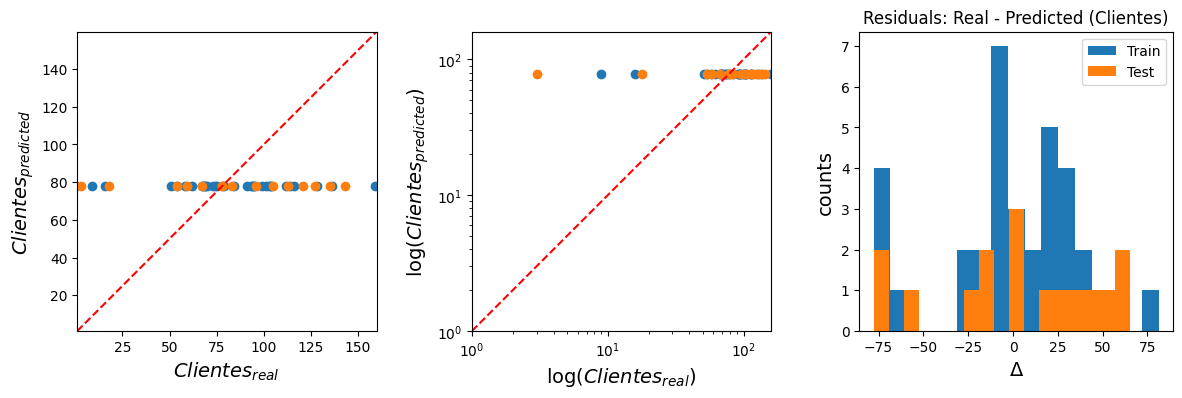

In [31]:
metricas_por_modelo = {}

metricas_por_modelo['dummy'] = plot_model_predictions(dummy_model, X_train, X_test, y_train, y_test, return_metrics=True)

# XGBoost

In [32]:
xgb_pipe = xgboost_pipeline(X, random_state=random_state, gpu=cupy_library)
xgb_pipe

Pipeline(steps=[('encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encode_labels',
                                                  OrdinalEncoder(dtype=<class 'int'>,
                                                                 encoded_missing_value=-2,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  [])])),
                ('scaling',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  [0, 1, 2])])),
                ('numpy2cupy', NumpyToCupyTransformer()),
                ('xgb_mode...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=13, ...))])

In [33]:
cv = KFold(n_splits=cv_n_splits, shuffle=True, random_state=random_state)
alpha_list = list(np.round(stats.lognorm.rvs(0.93, size=alpha_list_size)/10,4))

xgb_scan_parameters = {
    "xgb_model__n_estimators": [5,7,17,23,29,39,47,57,79,91,129,179,279],
    "xgb_model__scale_pos_weight":[0,1,3,5,7,13],
    "xgb_model__subsample":[0.6,0.7,0.8,0.9,1],
    "xgb_model__learning_rate":[0.05, 0.01, 0.1],
    "xgb_model__gamma": alpha_list,
    'xgb_model__lambda': alpha_list,
    "xgb_model__colsample_bytree":[0.7,0.8,0.9,1],
    "xgb_model__colsample_bylevel":[0.7,0.8,0.9,1],
    'xgb_model__max_depth': [5,6,7,8,9,11,13,17,23]
}

print(alpha_list)

[0.1638, 0.2323, 0.1759, 0.0211, 0.1902, 0.0369, 0.2022, 0.1282, 0.0223, 0.0405, 0.4316, 0.2267, 0.2974, 0.0577, 0.0795, 0.551, 0.0484, 0.084, 0.2366]


In [34]:
xgb_baseline = RandomizedSearchCV(xgb_pipe,
                                  param_distributions=xgb_scan_parameters, 
                                  n_iter=n_iter,
                                  cv=cv,
                                  n_jobs=max_n_jobs,
                                  verbose=verbose, 
                                  scoring=rmse_scorer,#'r2')
                                  return_train_score=True, refit=True)

In [35]:
start_time = time.time()

xgb_baseline.fit(X_train, y_train)
xgb_baseline_fit = xgb_baseline.best_estimator_

print("--- %s Minutes on training time  ---" % (round((time.time() - start_time)/60,2)))

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits
--- 36.83 Minutes on training time  ---


Train Median per CV: [(0, -17.4451), (1, -15.4187), (2, -13.939)]
Test Median per CV: [(0, -23.1397), (1, -33.2525), (2, -41.8873)]


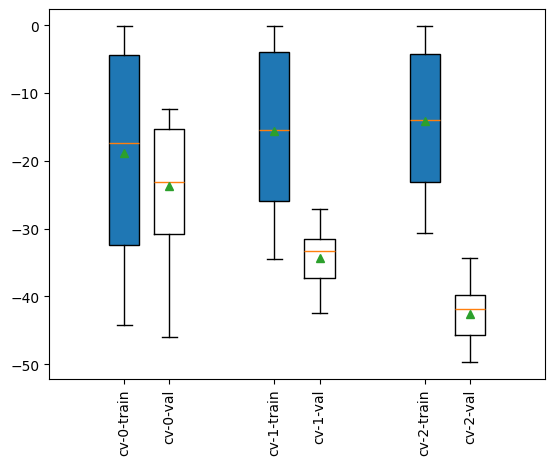

In [36]:
plot_xgb_cv(xgb_baseline.cv_results_, cv_splits=cv)

In [37]:
print("Best parameter (CV score=%0.3f):" % xgb_baseline.best_score_)
print(xgb_baseline.best_params_)

Best parameter (CV score=-30.030):
{'xgb_model__subsample': 0.9, 'xgb_model__scale_pos_weight': 5, 'xgb_model__n_estimators': 23, 'xgb_model__max_depth': 17, 'xgb_model__learning_rate': 0.05, 'xgb_model__lambda': 0.2323, 'xgb_model__gamma': 0.2267, 'xgb_model__colsample_bytree': 0.8, 'xgb_model__colsample_bylevel': 0.9}



Train  rmse :  22.7085
Test  rmse :  33.7747

Train  mae :  16.6189
Test  mae :  29.3706

Train  mape :  0.3298
Test  mape :  1.5062

Train  r2 :  0.6379
Test  r2 :  0.3982


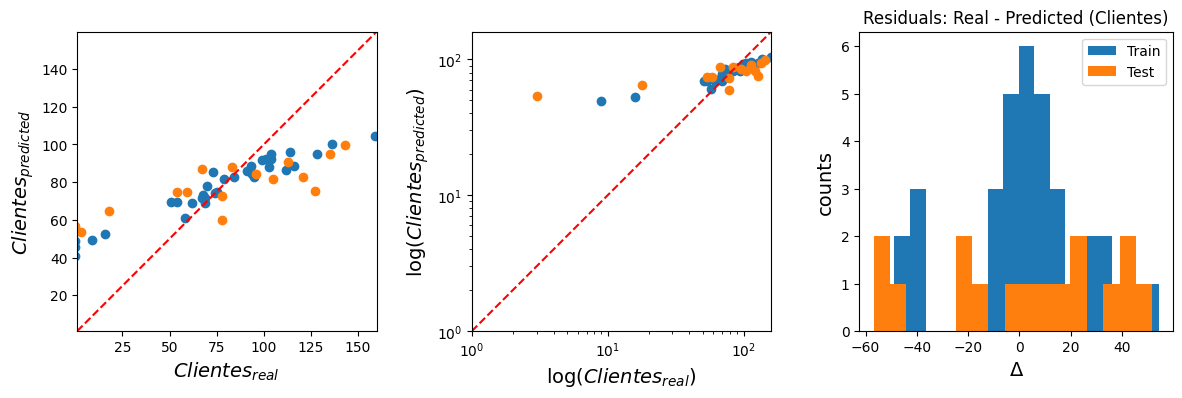

In [38]:
metricas_por_modelo['xgb'] = plot_model_predictions(xgb_baseline_fit, X_train, X_test, y_train, y_test, return_metrics=True)

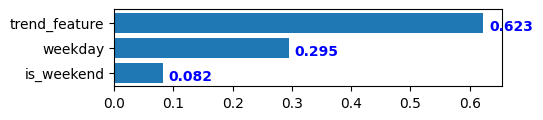

In [39]:
feature_importances = xgb_baseline.best_estimator_.named_steps['xgb_model'].feature_importances_
features_coef = pd.DataFrame(zip(X_train.columns, feature_importances), columns=['feature','coef']).sort_values(by='coef', ascending=True)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 1))
ax.barh(features_coef['feature'], features_coef['coef'], )

for i, v in enumerate(features_coef['coef'],):
    ax.text(v +.01, i -0.3, str(round(v,3)), color='blue', fontweight='bold')
    
plt.show()

# Deep Learning

# Resmen de Modelos

In [40]:
# Convertir el diccionario en un DataFrame
models_metrics_df = pd.DataFrame.from_dict({(i,j): metricas_por_modelo[i][j]
                             for i in metricas_por_modelo.keys()
                             for j in metricas_por_modelo[i].keys()},
                             orient='index')

# Ajustar el nombre de las columnas
models_metrics_df.index = pd.MultiIndex.from_tuples(models_metrics_df.index)
models_metrics_df.columns = ['train', 'test']

# Resetear el índice para tener una columna separada para los modelos y métricas
models_metrics_df = models_metrics_df.reset_index()
models_metrics_df.columns = ['model', 'metric', 'train', 'test']

models_metrics_df.sort_values(by=['metric','model'])

,model,metric,train,test
1,dummy,mae,28.977959,35.432143
5,xgb,mae,16.618935,29.370587
2,dummy,mape,0.571804,2.107890
6,xgb,mape,0.329780,1.506247
3,dummy,r2,0.000000,-0.002620
7,xgb,r2,0.637912,0.398230
0,dummy,rmse,37.738261,43.595774
4,xgb,rmse,22.708512,33.774699
